# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
from keras.callbacks import ModelCheckpoint

# Funções Auxiliares

In [2]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

# Análise dos Dados

## Carregando a base de dados

In [3]:
df = pd.read_csv("./data/heart.csv")

## Amostra dos dados

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Conferindo se temos dados nulos, qual o formato das variáveis e quais podem ser numéricas ou categóricas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Distribuição das respostas

C:\Users\hgf77\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


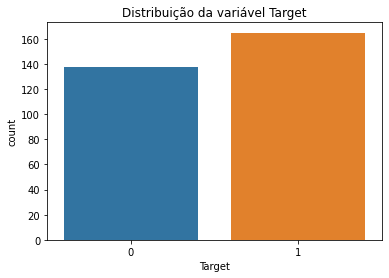

In [7]:
sns.countplot(df.target)
plt.title('Distribuição da variável Target')
plt.xlabel('Target')
plt.xticks(ticks=range(0,2), labels=['0', '1'])
plt.show()

## Análise de correlação

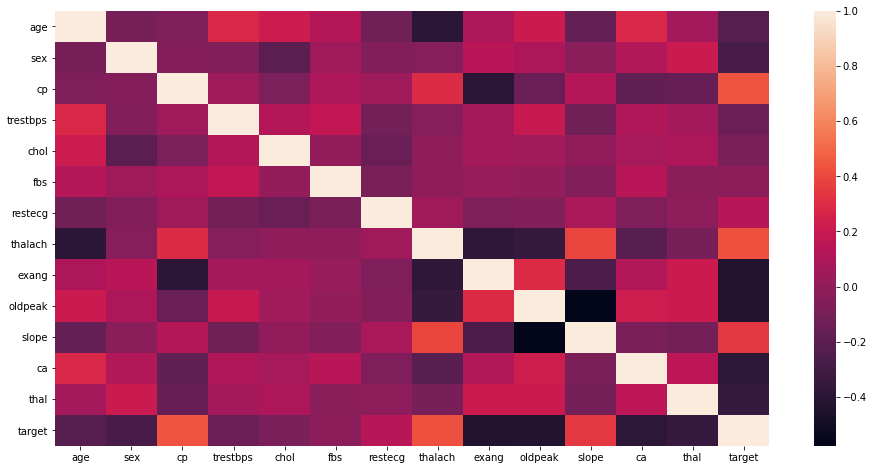

In [8]:
fig = plt.figure(figsize=(16,8))
sns.heatmap(df.corr());

In [9]:
#df.drop(['thalach', 'exang', 'slope'], axis=1, inplace=True)

## Padronizando os dados com a função StandardScaler
### Dados finais com média 0 e desvio padrão 1

In [10]:
scaler = StandardScaler()
X = df.iloc[:,0:13].copy()
X = scaler.fit_transform(X)
X[:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [11]:
num_features = X.shape[1]
X.shape

(303, 13)

In [12]:
y = df.target.to_numpy()
y.shape

(303,)

## Dividindo a Base de Dados entre 80% Treino e 20% Teste.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(242, 13)

In [15]:
y_train.shape

(242,)

# Modelo de MLP

## Criando o modelo

In [23]:
model = Sequential()
model.add(Dense(26, input_dim=num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(26, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1 , activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 39)                546       
_________________________________________________________________
dropout_2 (Dropout)          (None, 39)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 26)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 27        
Total params: 1,613
Trainable params: 1,613
Non-trainable params: 0
_________________________________________________________________
None


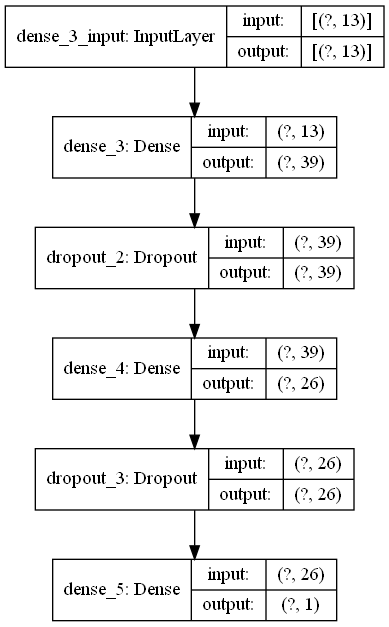

In [24]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Compilando e treinando o modelo. 
### Vamos utilizar a função de Callback ModelCheckPointer para salvar o modelo com a melhor accuracia na base de validação (que é a mesma de teste final pois temos uma base muito pequena)

In [25]:
%%time
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='./modelo_mlp_ex3_2.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=24, verbose=1, callbacks=[checkpointer])

Epoch 1/300
 1/11 [=>............................] - ETA: 0s - loss: 0.8300 - accuracy: 0.5000
Epoch 00001: val_accuracy improved from -inf to 0.63934, saving model to .\modelo_mlp_ex3_2.hdf5
11/11 [==============================] - 0s 27ms/step - loss: 0.7385 - accuracy: 0.5413 - val_loss: 0.6502 - val_accuracy: 0.6393
Epoch 2/300
 1/11 [=>............................] - ETA: 0s - loss: 0.7198 - accuracy: 0.5000
Epoch 00002: val_accuracy improved from 0.63934 to 0.77049, saving model to .\modelo_mlp_ex3_2.hdf5
11/11 [==============================] - 0s 9ms/step - loss: 0.6946 - accuracy: 0.5455 - val_loss: 0.5992 - val_accuracy: 0.7705
Epoch 3/300
 1/11 [=>............................] - ETA: 0s - loss: 0.6045 - accuracy: 0.7083
Epoch 00003: val_accuracy improved from 0.77049 to 0.86885, saving model to .\modelo_mlp_ex3_2.hdf5
11/11 [==============================] - 0s 6ms/step - loss: 0.6126 - accuracy: 0.6818 - val_loss: 0.5588 - val_accuracy: 0.8689
Epoch 4/300
 1/11 [=>.........

## Gráfico comparativo de Acurácia e Perda no treinamento

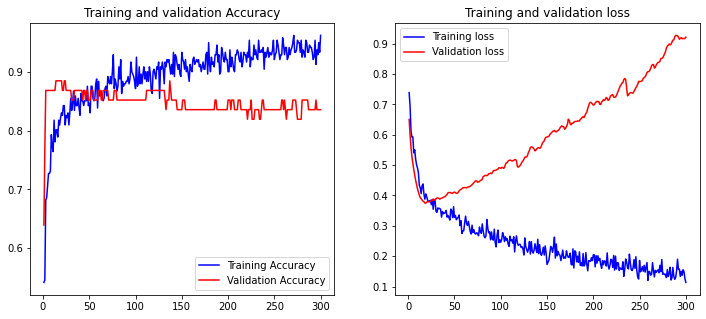

In [26]:
plot_history(history)

## Apresentando a Acurácia final do Treino, carregando o melhor modelo salvo e apresentando a Acurácia do Teste

In [27]:
scores = model.evaluate(X_train, y_train)
print()
print(f"Acuracia do Treino: {round(scores[1]*100,2)}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9711

Acuracia do Treino: 97.11%


In [28]:
model = load_model("./modelo_mlp_ex3_2.hdf5")

In [29]:
scores = model.evaluate(X_test, y_test)
print()
print(f"Acuracia do Teste: {round(scores[1]*100,2)}%")

2/2 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8852

Acuracia do Teste: 88.52%
